## Logstic Regression

#### Do the predictive modelling on insurance.csv dataset
##### Objective is to predict who will buy insurance and who wont on the basis of Age

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from math import e
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(2)

,age,braught_insurance
0,22,0
1,25,0


##### Check the relationship of data

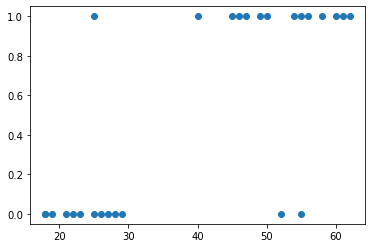

In [4]:
plt.scatter(df.age,df.braught_insurance)
plt.show()

#### After looking at the relation we can conclude: its a binary classification problem, hence apply Logistic regression

##### Create input and output

In [5]:
X = df.age

In [6]:
X.ndim

1

In [7]:
X[:3]

0    22
1    25
2    47
Name: age, dtype: int64

In [8]:
X = df[['age']]

In [9]:
X[:3]

,age
0,22
1,25
2,47


In [10]:
X.ndim #input should be always 2D

2

In [11]:
y = df.braught_insurance

In [12]:
y[:3]

0    0
1    0
2    1
Name: braught_insurance, dtype: int64

##### Split the dataset

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [14]:
X_train.shape

(18, 1)

In [15]:
X_test.shape

(9, 1)

In [16]:
X.shape

(27, 1)

##### Call the Logistic regression algorithm

In [17]:
#create object of Logistic
model = LogisticRegression()

In [18]:
model

LogisticRegression()

##### fit the model/ training

In [19]:
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
#after fitting the model, algorithm has calculated m and c value(y = mx+c)
model.coef_

array([[0.14650496]])

In [21]:
model.intercept_

array([-5.44290869])

##### Prediction

In [22]:
X_test[:3]

,age
8,62
7,60
6,55


In [23]:
y_pred = model.predict(X_test)
y_pred[:3]

array([1, 1, 1], dtype=int64)

In [24]:
model.predict([[35]])

array([0], dtype=int64)

##### Proof

In [25]:
e

2.718281828459045

In [26]:
1/(1+e**(-(model.coef_*35+model.intercept_)))

array([[0.42183745]])

In [27]:
#When age is 35 person is not going to buy insurance

In [28]:
#Probability estimates.
#it contains 2 probablities: +ve and -ve
model.predict_proba([[35]])*100

array([[57.81625498, 42.18374502]])

In [29]:
X_test[:3]

,age
8,62
7,60
6,55


In [30]:
model.predict_proba(X_test[:3])

array([[0.02557085, 0.97442915],
       [0.03398077, 0.96601923],
       [0.06818789, 0.93181211]])

In [31]:
100-86

14

##### Check the accuracy

In [32]:
model.score(X_train,y_train)*100

88.88888888888889

In [33]:
model.score(X_test,y_test)*100

88.88888888888889

In [34]:
model.score(X_test,y_pred)*100

100.0

##### If i want to check Actual vs Predicted accuracy then ?????

In [35]:
model.score(y_test,y_pred)*100

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 0 1 1 0 0 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [36]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [37]:
y_test

8     1
7     1
6     0
4     1
24    1
1     0
19    0
15    1
10    0
Name: braught_insurance, dtype: int64

In [38]:
np.array(y_test).reshape(-1,1)

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [39]:
model.score(np.array(y_test).reshape(-1,1),y_pred)

0.3333333333333333

##### There are diferent loss functions present to measure the accuracy of Actual vs predicted

In [40]:
#MAE
mean_absolute_error(y_test,y_pred)*100

11.11111111111111

In [41]:
#MSE
mean_squared_error(y_test,y_pred)*100

11.11111111111111

In [42]:
#RMSE

sqrt(mean_squared_error(y_test,y_pred)*100)

3.3333333333333335

In [43]:
r2_score(y_test,y_pred)*100

55.00000000000001

In [44]:
accuracy_score(y_test,y_pred)*100

88.88888888888889